Install libraries

In [5]:
%pip install numpy, pandas, matplotlib, sklearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'numpy,'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import necessary libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Download dataset

In [7]:
diamonds = sns.load_dataset('diamonds')
diamonds_columns = ['carat', 'depth', 'price']
print(diamonds[diamonds_columns])

       carat  depth  price
0       0.23   61.5    326
1       0.21   59.8    326
2       0.23   56.9    327
3       0.29   62.4    334
4       0.31   63.3    335
...      ...    ...    ...
53935   0.72   60.8   2757
53936   0.72   63.1   2757
53937   0.70   62.8   2757
53938   0.86   61.0   2757
53939   0.75   62.2   2757

[53940 rows x 3 columns]


Extract numeric values

In [8]:
values = diamonds[diamonds_columns].values

Calculate mean and standard deviation for each column, ignoring NaN values

In [9]:
mean_values = np.nanmean(values, axis=0)
std_values = np.nanstd(values, axis=0)

2. Calculate z-scores for each value

In [10]:
z_scores = np.abs((values - mean_values) / std_values)
print(z_scores)

[[1.19816781 0.17409151 0.90409516]
 [1.24036129 1.36073849 0.90409516]
 [1.19816781 3.38501862 0.9038445 ]
 ...
 [0.20662095 0.73334442 0.29473076]
 [0.13092691 0.52310533 0.29473076]
 [0.10113725 0.31452784 0.29473076]]


Aggregate z-scores, average value

In [11]:
aggregated_z_scores = np.nanmean(z_scores, axis=1)

Aggregate z-scores, median

In [ ]:
# aggregated_z_scores = np.nanmedian(z_scores, axis=1)

In [12]:
print(aggregated_z_scores)

[0.75878482 1.16839831 1.82901031 ... 0.41156538 0.31625433 0.23679862]


3 find atypical data points where aggregated z-score > 3

In [13]:
atypical_indices = np.where(aggregated_z_scores > 3)[0]

if len(atypical_indices) < 5:
    non_nan_indices = np.where(~np.isnan(aggregated_z_scores))[0]
    atypical_indices = non_nan_indices[np.argsort(aggregated_z_scores[non_nan_indices])[-10:]]

If there are fewer than 5 atypical data points, select 5-10 with the highest aggregated z-scores

In [14]:
if len(atypical_indices) < 5:
    atypical_indices = np.argsort(aggregated_z_scores)[-10:]

Plotting

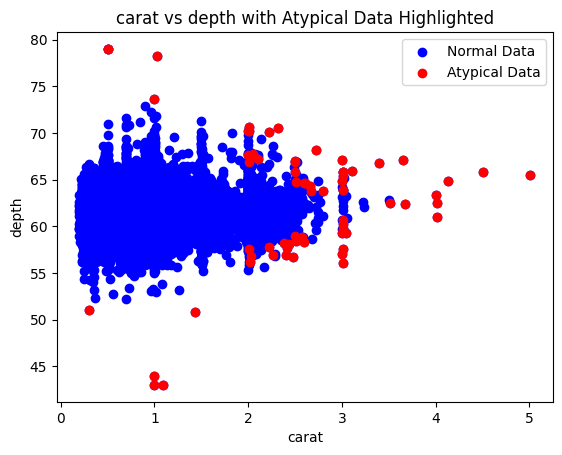

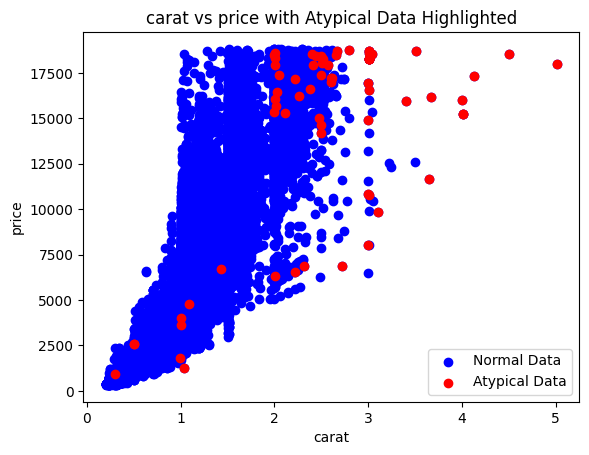

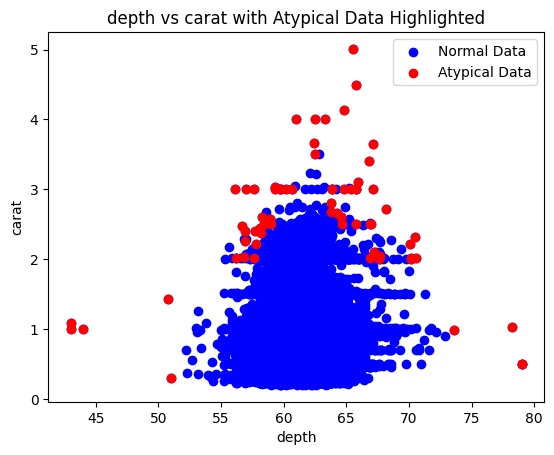

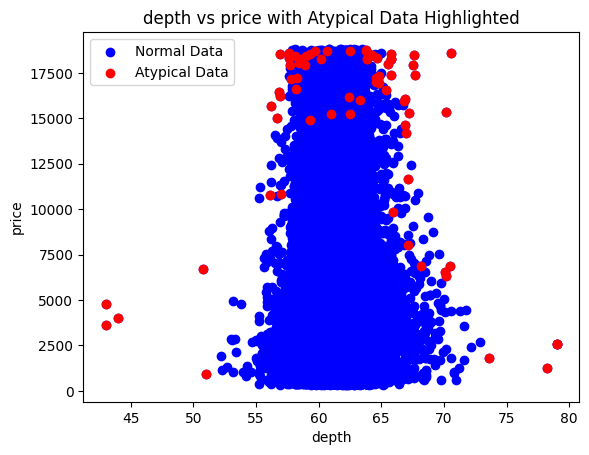

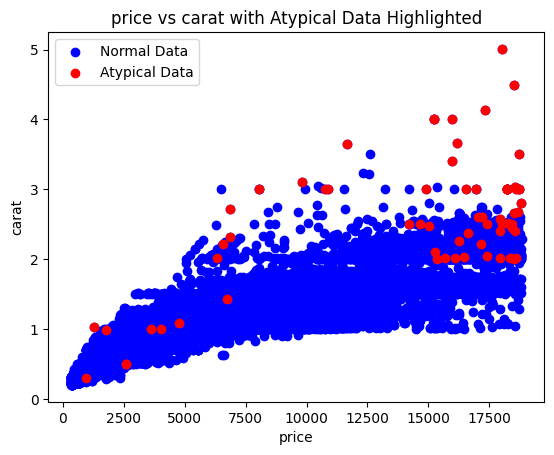

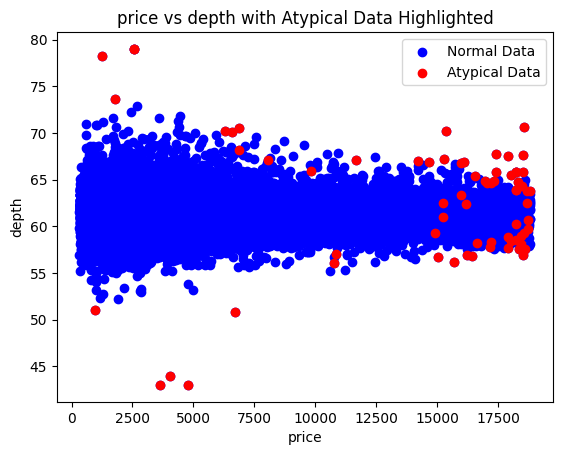

In [15]:
for i, column in enumerate(diamonds_columns):
    for j, other_column in enumerate(diamonds_columns):
        if i != j:
            plt.figure()
            plt.scatter(diamonds[column], diamonds[other_column], label='Normal Data', color='blue')
            plt.scatter(diamonds.loc[atypical_indices, column], diamonds.loc[atypical_indices, other_column], label='Atypical Data', color='red')
            plt.xlabel(column)
            plt.ylabel(other_column)
            plt.legend()
            plt.title(f'{column} vs {other_column} with Atypical Data Highlighted')
            plt.show()